In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "F:\\Work\\Tutorials\\AI\\0104\\S12\\dog-cat\\dataset\\"
N_SMP = 2000
IMG_SIZE = 60, 60

In [3]:
img = cv2.imread(DATA_DIR + "Cat\\0.jpg")

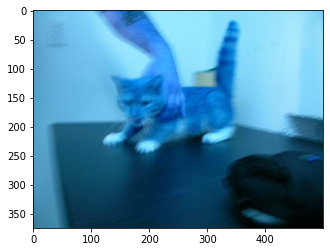

In [4]:
plt.imshow(img, cmap='gray')

In [5]:
x0 = []
for i in range(N_SMP):
    img = cv2.imread(DATA_DIR + f"Cat\\{i}.jpg")
    if img is not None:
        x0.append(np.expand_dims(cv2.cvtColor(cv2.resize(img, IMG_SIZE), cv2.COLOR_BGR2GRAY), 2))


In [6]:
x1 = []
for i in range(N_SMP):
    img = cv2.imread(DATA_DIR + f"Dog\\{i}.jpg")
    if img is not None:
        x1.append(np.expand_dims(cv2.cvtColor(cv2.resize(img, IMG_SIZE), cv2.COLOR_BGR2GRAY), 2))

In [7]:
print(x1[0].shape)

(60, 60, 1)


In [8]:
x = np.array(x0 + x1) / 255.
y = np.array([0]*len(x0) + [1]*len(x1))

In [9]:
print(x.shape, y.shape)

(3993, 60, 60, 1) (3993,)


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8)

In [11]:
print(y_val)

[0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0
 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1
 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0
 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0
 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 0 0 1 0 1 0 1 

In [19]:
n_neurons = [(8, 16, 32), (16, 32, 64)]
activation_type = ['relu', 'tanh', 'linear']
kernels = [(3, 3), (5, 5), (7, 7)]

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [20]:
j = 0
for nn in n_neurons:
    for at in activation_type:
        for k in kernels:
            model = Sequential()

            model.add(Conv2D(filters=nn[0], kernel_size=k, strides=(1, 1),
                             activation=at, padding='same', input_shape=x_train.shape[1:]))

            model.add(MaxPooling2D((2, 2), (2, 2)))

            model.add(Conv2D(filters=nn[1], kernel_size=k, strides=(1, 1), activation=at, padding='same'))

            model.add(MaxPooling2D((2, 2), (2, 2)))

            model.add(Conv2D(filters=nn[2], kernel_size=k, strides=(1, 1), activation=at, padding='same'))

            model.add(MaxPooling2D((2, 2), (2, 2)))

            model.add(Flatten())

            model.add(Dense(units=256, activation=at))

            model.add(Dense(units=128, activation=at))

            model.add(Dense(units=32, activation=at))

            model.add(Dense(units=1, activation='sigmoid'))
            
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
            
            print(model.summary())
            
            model.fit(x_train, y_train, epochs=2, validation_data=(x_val, y_val))
            
            model.save(f'model{j}.h5')
            
            j += 1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 60, 60, 8)         80        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)        

                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_16 (Dense)            (None, 256)               401664    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 444,609
Trainable params: 444,609
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
100/100 [==============================] - 6s 31ms/step - loss: 0.6496 - accuracy: 0.6234 - val_loss: 0.5845 - val_accura

100/100 [==============================] - 3s 26ms/step - loss: 0.6307 - accuracy: 0.6534 - val_loss: 0.6135 - val_accuracy: 0.6608
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 60, 60, 8)         208       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 16)        3216      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 15, 15, 32)       

 max_pooling2d_35 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 3136)              0         
                                                                 
 dense_44 (Dense)            (None, 256)               803072    
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dense_46 (Dense)            (None, 32)                4128      
                                                                 
 dense_47 (Dense)            (None, 1)                 33        
                                                                 
Total params: 904,641
Trainable params: 904,641
Non-trainable params: 0
_________________________________________________________________
None

100/100 [==============================] - 5s 37ms/step - loss: 0.7071 - accuracy: 0.4978 - val_loss: 0.6929 - val_accuracy: 0.5106
Epoch 2/2
100/100 [==============================] - 4s 39ms/step - loss: 0.6945 - accuracy: 0.4903 - val_loss: 0.6931 - val_accuracy: 0.4894
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 60, 60, 16)        800       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 30, 30, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 30, 30, 32)        25120     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                      

 conv2d_56 (Conv2D)          (None, 15, 15, 64)        100416    
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 3136)              0         
                                                                 
 dense_72 (Dense)            (None, 256)               803072    
                                                                 
 dense_73 (Dense)            (None, 128)               32896     
                                                                 
 dense_74 (Dense)            (None, 32)                4128      
                                                                 
 dense_75 (Dense)            (None, 1)                 33        
                                                                 
Total para

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

Epoch 1/20
100/100 [==============================] - 6s 30ms/step - loss: 0.6936 - accuracy: 0.5225 - val_loss: 0.6866 - val_accuracy: 0.5207
Epoch 2/20
100/100 [==============================] - 3s 25ms/step - loss: 0.6719 - accuracy: 0.5905 - val_loss: 0.6424 - val_accuracy: 0.6433
Epoch 3/20
100/100 [==============================] - 3s 34ms/step - loss: 0.6349 - accuracy: 0.6421 - val_loss: 0.6161 - val_accuracy: 0.6546
Epoch 4/20
100/100 [==============================] - 2s 25ms/step - loss: 0.6016 - accuracy: 0.6691 - val_loss: 0.6142 - val_accuracy: 0.6846
Epoch 5/20
100/100 [==============================] - 3s 27ms/step - loss: 0.5481 - accuracy: 0.7167 - val_loss: 0.6114 - val_accuracy: 0.7084
Epoch 6/20
100/100 [==============================] - 4s 36ms/step - loss: 0.5084 - accuracy: 0.7455 - val_loss: 0.5720 - val_accuracy: 0.7272
Epoch 7/20
100/100 [==============================] - 3s 32ms/step - loss: 0.4517 - accuracy: 0.7796 - val_loss: 0.6034 - val_accuracy: 0.6896